# Pandas综合应用1
导入ca_list_copy.csv文件到DataFrame
- 1、对异常数据（数据为0）进行值替换，替换为当前列的平均值；
- 2、对zwyx列的数据进行平均值统计，其他列做计数统计
- 3、得到zwmc的唯一值列表
- 4、通过group函数，实现对于dd字段的分组，并按照城市计算每个城市的最大薪资
- 5、使用折线图，显示Top10城市

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
df = pd.read_csv('ca_list_copy.csv')
average = df.zwyx.mean()
print(average)

8152.994976359338


In [5]:
#1、对异常数据（数据为0）进行值替换，替换为当前列的平均值；
#for i in (df.Id-1):
#    if df.loc[i,'zwyx'] == 0.0:
#        df.loc[i,'zwyx'] = average

df = df.replace({0.0:df['zwyx'].mean()})
df

,Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
0,1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500.000000,大专,1-3年
1,2,数据分析师,智联招聘,天津,上市公司,1000-9999人,8152.994976,本科,无经验
2,3,数据分析师,捷信中国,天津,外商独资,10000人以上,8152.994976,本科,1-3年
3,4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.500000,本科,3-5年
4,5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
5,6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
6,7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.500000,大专,无经验
7,8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.500000,本科,无经验
8,9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.500000,大专,无经验
9,10,6000-15000金融数据分析师/交易员 五险一金+实习生+弹性时间,北京华中投资有限公司,北京,股份制企业,100-499人,8152.994976,本科,无经验


In [6]:
# 2、对zwyx列的数据进行平均值统计，其他列做计数统计
print('zwyx：平均值：',df['zwyx'].mean())

zwyx：平均值： 8263.821740222376


In [7]:
col = list(df.columns)
col.remove('Id')
col.remove('zwyx')
new_df=  pd.DataFrame()
 
 
for i in col:
    result = df[i].value_counts()
    result
    re = pd.DataFrame(result)
    re.columns = ['values']
    #两个DaFrame合并
    new_df = pd.concat([new_df,re])
new_df

数据分析师                              216
高薪加五险 诚聘金融数据分析师/分析助理/操盘手/交易员        24
大数据分析师                              23
SEM医疗竞价专员                           19
7K大数据开发与维护                          19
呼叫中心数据分析师                           18
成功人总把复杂的事情简单化诚聘数据分析师月薪1W+           15
数据分析助理、五险一金+提成+两人间住宿                15
金融数据分析师                             14
数据分析师（应届生亦可）160810                  14
数据分析师 应届生亦可160828                   13
高级数据分析师                             13
数据分析师 应届生亦可160823                   12
数据分析员                               12
- 不要着急，有些人就是大器晚成- 金融数据分析师           11
世上无难事.只怕有心人、招揽奇才-万向联合聘金融数据分析师       11
财务工作急招（2017年某银行江苏省分行社会招聘启事）         11
金融储备干部+金融助理+数据分析师 应届生/无经验一对一培训      10
数据分析主管                              10
数据分析专员                              10
数据分析                                 9
数据分析师 应届生亦可161008                    9
数据分析师 包食宿160824                      9
数据分析师  包食宿161201                     8
双休五险有发展稳定想挑战的来万向▂☞金融数据分析师            8
❤动不如行动→外汇交易员 ←数据分析师 +0基础培

In [8]:
#3 得到zwmc字段的唯一值列表
list(df['zwmc'].unique())

['数据分析师',
 '中/高级数据分析师',
 '6k聘金融数据分析师/助理/交易分析师（五险双休',
 '证券分析师、助理、数据分析',
 '--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师',
 'BI分析师助理/数据分析师助理税后月薪5500，包吃，房补',
 '6000-15000金融数据分析师/交易员 五险一金+实习生+弹性时间',
 '招聘数据分析师（五险双休早九晚五）',
 '钱进道路上万向为你保驾护航，金融数据分析师及助理+双休',
 '职位颜值高 薪资更是刁到爆发 汇金利德诚聘金融数据分析师/助理',
 '高薪诚聘优秀金融数据分析师+周末双休+早九晚六+社保福利',
 '【金鼎奖十大诚信品牌企业】万向诚聘金融数据分析师+可实习',
 '金融外汇数据分析师助理（可实习） 6千底薪五险',
 '【0基础培训】外汇数据分析师',
 '招募金融数据分析师/证券分析师有无经验均可+基础培训',
 '¤豪宅金融证券数据分析师通缉令¤【五险一金】成就你的北京梦',
 '金融数据分析师助理',
 '万向联合诚聘金融技术岗精英 数据分析师/助理+内部可晋升',
 '【万向联合】招聘金融交易员/数据分析师（五险双休早九晚五）',
 '数据分析师-国际化',
 '招金融数据分析师    出国旅游、节日福利',
 '★任性高薪★职等你来☞金融证券、外汇数据分析师',
 '再不转行就老了 公司高薪直招金融外汇数据分析师/助理',
 '高薪加五险 诚聘金融数据分析师/分析助理/操盘手/交易员',
 '大数据分析师/数据挖掘/BI',
 '统计员/数据分析师/实习生',
 '挑战月薪过万，高薪金融数据分析师及助理',
 '数据分析师//五险双休',
 '金融数据分析师 五险一金 双休',
 '梦想让我与众不同，奋斗让我改变命运；数据分析师',
 '0经验带薪培训 诚聘数据分析师（助理）',
 '♥任性高薪，为你生活撑腰♥金融数据分析师',
 '可兼职实习 0经验带薪培训 诚聘数据分析师（助理）',
 '菜鸟逆袭，职场不相信眼泪+数据分析师+五险一金+六日双休',
 '激战----别说成功没有给你机会 金融数据分析师',
 '0基础聘金融数据分析师',
 '破茧成证券分析师/金融数据 五险一金 有双休/海外留学生优先',
 '豪起来 数据分析师助理',
 '低门槛+

In [9]:
#4 通过group函数，实现对于dd字段的分组，
#并按照城市计算每个城市的最大薪资，拓展：使用折线图，显示Top10城市。
data = df.groupby('dd')['zwyx'].max().sort_values(ascending = False).head(10)
data

dd
上海    40000.5
北京    40000.5
济南    25000.5
深圳    25000.5
广州    25000.5
南京    25000.5
天津    25000.5
杭州    20000.0
长沙    18000.0
无锡    17500.5
Name: zwyx, dtype: float64

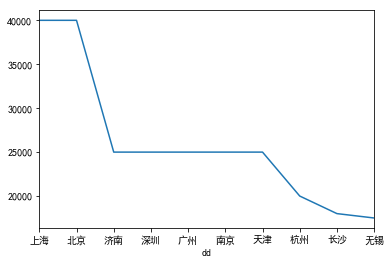

In [8]:
data.plot()
plt.show()